In [1]:
%cd ~/protein-transfer

/home/francesca/protein-transfer


In [2]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [30]:
from __future__ import annotations

import ast

import numpy as np
import pandas as pd

from scr.params.emb import MODEL_SIZE, MODEL_LAYER
from scr.params.vis import ORDERED_TASK_LIST, TASK_LEGEND_MAP, CHECKPOINT_ALPHA

In [4]:
# try to under the scalbility for both model size and degree pretrain
# the highest performing layer of the smallest to the largest

In [5]:
result_df_path = "results/summary/all_results.csv"

result_df = pd.read_csv(result_df_path)

# check column name existance
for c in ["metric", "ablation", "arch", "value", "task", "model", "ptp"]:
    assert c in result_df.columns, f"{c} not in df from {result_df_path}"

# Convert the string of lists to NumPy arrays
result_df["value"] = result_df["value"].apply(ast.literal_eval).apply(np.array)

# make ptp float
result_df["ptp"] = result_df["ptp"].astype(float)

result_df

,arch,task,model,ablation,ptp,metric,value
0,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,train_loss,"[9.59526940116963, 6.894266263718891, 6.377686..."
1,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,val_loss,"[11.18654191999164, 8.622644328345816, 8.33617..."
2,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_loss,"[13.582533778622887, 53.712009437112215, 74.04..."
3,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_performance_1,"[0.9704321391244177, 0.9629028051372428, 0.962..."
4,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_performance_2,"[0.19544242309285326, 0.3282696048440418, 0.31..."
...,...,...,...,...,...,...,...
1743,esm,annotation_scl_balanced,onehot,onehot,0.0,train_loss,[0.3524752729817441]
1744,esm,annotation_scl_balanced,onehot,onehot,0.0,val_loss,[1.373852210385459]
1745,esm,annotation_scl_balanced,onehot,onehot,0.0,test_loss,[2.0159953236579895]
1746,esm,annotation_scl_balanced,onehot,onehot,0.0,test_performance_2,[0.37402597402597404]


In [6]:
prepped_df = result_df.copy()

# add task type and model size details for plotting legends
prepped_df["task_type"] = prepped_df["task"].str.split("_").str[0]
prepped_df["model_size"] = prepped_df["model"].map(MODEL_SIZE)
prepped_df["model_layer"] = prepped_df["model"].map(MODEL_LAYER)

# get rid of pooling details
prepped_df["task"] = prepped_df["task"].str.replace("_mean", "")
prepped_df["task"] = prepped_df["task"].str.replace("_noflatten", "")

# sort based on given task order for plot legend
prepped_df["task"] = pd.Categorical(
    prepped_df["task"], categories=ORDERED_TASK_LIST, ordered=True
).map(TASK_LEGEND_MAP)
prepped_df = prepped_df.sort_values(["task", "ptp"], ascending=[True, False])

prepped_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer
80,carp,GB1 - sampled,carp_640M,emb,1.0,train_loss,"[2.5043217133381526, 1.8768573377906583, 1.809...",proeng,640.00,56
81,carp,GB1 - sampled,carp_640M,emb,1.0,val_loss,"[2.4487856676276403, 1.889322691593076, 1.8535...",proeng,640.00,56
82,carp,GB1 - sampled,carp_640M,emb,1.0,test_loss,"[2.5326230877883487, 1.9205839668776579, 1.879...",proeng,640.00,56
83,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_1,"[0.8536247926960799, 0.9469106827092577, 0.949...",proeng,640.00,56
84,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_2,"[0.433213705534327, 0.8222689931610957, 0.8221...",proeng,640.00,56
...,...,...,...,...,...,...,...,...,...,...
1691,esm,NaN,esm1_t6_43M_UR50S,stat,0.0,val_loss,"[0.9926145014009977, 0.9802829968301874, 0.972...",structure,43.00,6
1701,esm,NaN,esm1b_t33_650M_UR50S,stat,0.0,train_loss,"[0.9954574287754215, 0.976576955351111, 0.9950...",structure,650.00,33
1702,esm,NaN,esm1b_t33_650M_UR50S,stat,0.0,val_loss,"[0.9926900832276595, 0.9727039494012532, 0.995...",structure,650.00,33
1732,esm,NaN,onehot,onehot,0.0,train_loss,[1.0096537658613023],structure,0.02,1


In [7]:

# Count the number of rows with NaN values to make sure just structure_ss3_tape_processed - should be 76
prepped_df.isna().any(axis=1).sum()

76

In [8]:
def get_best_metric_df(
    df: pd.DataFrame, metric: str = "test_performance_1", arch: str = ""
) -> pd.DataFrame:

    """
    A function for cleaning up the df to get best layer based on chosen metric
    """

    slice_df = df[(df["metric"] == metric)].copy()

    slice_df = slice_df[
        (slice_df["ablation"] == "onehot") | (slice_df["ablation"] == "emb")
    ]

    # get the max perform layer
    slice_df["best_value"] = slice_df["value"].apply(np.max)
    slice_df["best_layer"] = slice_df["value"].apply(np.argmax)

    # comb carp and esm
    if arch != "":
        slice_df = slice_df[(slice_df["arch"] == arch)].copy()
        
    # Find the index of the maximum value in 'value_column' for each group
    max_indices = slice_df.groupby(["task", "ablation"])["best_value"].idxmax().dropna()

    # Use loc to select the rows corresponding to the max indices
    slice_df = slice_df.loc[max_indices]

    return slice_df.copy()

In [9]:
metric = "test_performance_1"
slice_df = get_best_metric_df(df=prepped_df, metric=metric, arch="carp")
slice_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,best_value,best_layer
593,carp,GB1 - sampled,carp_640M,emb,0.250,test_performance_1,"[0.8512026750713972, 0.9481570927714634, 0.950...",proeng,640.00,56,0.979868,29
383,carp,GB1 - sampled,onehot,onehot,0.000,test_performance_1,[0.9342600571731149],proeng,0.02,1,0.934260,0
678,carp,GB1 - low vs high,carp_640M,emb,0.125,test_performance_1,"[0.9079242495861162, 0.9249716638321367, 0.924...",proeng,640.00,56,0.950725,47
373,carp,GB1 - low vs high,onehot,onehot,0.000,test_performance_1,[0.9178409557926928],proeng,0.02,1,0.917841,0
78,carp,GB1 - two vs rest,carp_640M,emb,1.000,test_performance_1,"[0.8422328260368166, 0.8919852742842274, 0.879...",proeng,640.00,56,0.912521,31
378,carp,GB1 - two vs rest,onehot,onehot,0.000,test_performance_1,[0.8905737288756033],proeng,0.02,1,0.890574,0
38,carp,AAV - two vs many,carp_640M,emb,1.000,test_performance_1,"[0.9725606587824112, 0.9747175045406921, 0.979...",proeng,640.00,56,0.986344,47
368,carp,AAV - two vs many,onehot,onehot,0.000,test_performance_1,[0.9629290404042454],proeng,0.02,1,0.962929,0
403,carp,AAV - one vs many,carp_600k,emb,0.500,test_performance_1,"[0.9695954085175728, 0.9657856194128362, 0.968...",proeng,0.60,16,0.973765,9
363,carp,AAV - one vs many,onehot,onehot,0.000,test_performance_1,[0.960145115831988],proeng,0.02,1,0.960145,0


In [10]:
emb_df = slice_df[slice_df["ablation"] == "emb"].copy()
emb_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,best_value,best_layer
593,carp,GB1 - sampled,carp_640M,emb,0.250,test_performance_1,"[0.8512026750713972, 0.9481570927714634, 0.950...",proeng,640.0,56,0.979868,29
678,carp,GB1 - low vs high,carp_640M,emb,0.125,test_performance_1,"[0.9079242495861162, 0.9249716638321367, 0.924...",proeng,640.0,56,0.950725,47
78,carp,GB1 - two vs rest,carp_640M,emb,1.000,test_performance_1,"[0.8422328260368166, 0.8919852742842274, 0.879...",proeng,640.0,56,0.912521,31
38,carp,AAV - two vs many,carp_640M,emb,1.000,test_performance_1,"[0.9725606587824112, 0.9747175045406921, 0.979...",proeng,640.0,56,0.986344,47
403,carp,AAV - one vs many,carp_600k,emb,0.500,test_performance_1,"[0.9695954085175728, 0.9657856194128362, 0.968...",proeng,0.6,16,0.973765,9
738,carp,Thermostability,carp_640M,emb,0.125,test_performance_1,"[0.9813129847231125, 0.9871396364773508, 0.987...",proeng,640.0,56,0.991915,19
977,carp,Subcellular localization,carp_640M,emb,0.500,test_performance_1,"[0.6258194095005859, 0.7004594033319493, 0.707...",annotation,640.0,56,0.877514,55
785,carp,SS3 - CASP12,carp_640M,emb,1.000,test_performance_1,"[0.569651794124983, 0.7229113201758404, 0.7781...",structure,640.0,56,0.861787,50
788,carp,SS3 - CB513,carp_640M,emb,1.000,test_performance_1,"[0.58521902044986, 0.7732639939715383, 0.83207...",structure,640.0,56,0.940782,50
791,carp,SS3 - TS115,carp_640M,emb,1.000,test_performance_1,"[0.5886661643179971, 0.7782446158099438, 0.842...",structure,640.0,56,0.943047,50


In [11]:
def get_layer_value(
    df: pd.DataFrame, row_to_match: dict, ablation: str, layer_numb: int, ptp: float = -1
) -> float:

    """
    A function to get value of a given layer and other specifics

    Args:
    - ptp: float = -1, include ptp only when ptp not default -1
    """

    row_to_match["ablation"] = ablation

    # overwrite default 
    if ptp > -1:
        row_to_match["ptp"] = ptp

    # Create a boolean mask for each condition
    conditions = [df[col] == value for col, value in row_to_match.items()]

    # Combine the conditions with AND (use np.all)
    mask = np.all(conditions, axis=0)

    # Use the mask to select the matching row(s)
    matching_rows = df[mask]

    assert len(matching_rows) == 1, f"{matching_rows} len not 1!"

    return matching_rows["value"].to_numpy()[0][int(layer_numb)]


In [12]:
# append the df with the same layer number from other ptp

# Pretrain percent
all_ptp = prepped_df["ptp"].unique()
all_ptp


array([1.   , 0.5  , 0.25 , 0.125, 0.   ])

In [13]:
# col to add

for ptp in all_ptp:
    if ptp != 0:
        emb_df[str(ptp)] = np.nan
        emb_df[f"{str(ptp)} - onehot"] = np.nan

emb_df = emb_df.reset_index(drop=True)

# get the corresponding stat and rand value at the layer
for i, row in emb_df.iterrows():

    # Convert the row to a dictionary
    row_dict = row.to_dict()

    # Select certain keys from the dictionary
    selected_keys = ["arch", "task", "metric", "model"]

    # pick the row to match
    row_to_match = {key: row_dict[key] for key in selected_keys}

    # get the onehot baseline
    onehot_val = get_layer_value(
            df=prepped_df,
            row_to_match={key: row_dict[key] if i < 3 else "onehot" for i, key in enumerate(selected_keys)},
            ablation="onehot",
            layer_numb=0,
        )
    
    for ptp in all_ptp:

        if ptp != 0:

            statorrand_val = get_layer_value(
                df=prepped_df,
                row_to_match=row_to_match,
                ablation="emb",
                ptp=ptp,
                layer_numb=row_dict["best_layer"],
            )

            emb_df.at[i, str(ptp)] = statorrand_val
            emb_df.at[i, f"{str(ptp)} - onehot"] = statorrand_val - onehot_val


In [14]:
emb_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,best_value,best_layer,1.0,1.0 - onehot,0.5,0.5 - onehot,0.25,0.25 - onehot,0.125,0.125 - onehot
0,carp,GB1 - sampled,carp_640M,emb,0.250,test_performance_1,"[0.8512026750713972, 0.9481570927714634, 0.950...",proeng,640.0,56,0.979868,29,0.977273,0.043013,0.976896,0.042636,0.979868,0.045608,0.976295,0.042035
1,carp,GB1 - low vs high,carp_640M,emb,0.125,test_performance_1,"[0.9079242495861162, 0.9249716638321367, 0.924...",proeng,640.0,56,0.950725,47,0.945942,0.028101,0.947803,0.029962,0.948898,0.031057,0.950725,0.032884
2,carp,GB1 - two vs rest,carp_640M,emb,1.000,test_performance_1,"[0.8422328260368166, 0.8919852742842274, 0.879...",proeng,640.0,56,0.912521,31,0.912521,0.021948,0.893158,0.002584,0.900222,0.009648,0.877058,-0.013516
3,carp,AAV - two vs many,carp_640M,emb,1.000,test_performance_1,"[0.9725606587824112, 0.9747175045406921, 0.979...",proeng,640.0,56,0.986344,47,0.986344,0.023414,0.974275,0.011346,0.981965,0.019036,0.981224,0.018295
4,carp,AAV - one vs many,carp_600k,emb,0.500,test_performance_1,"[0.9695954085175728, 0.9657856194128362, 0.968...",proeng,0.6,16,0.973765,9,0.973170,0.013025,0.973765,0.013620,0.970083,0.009938,0.967729,0.007584
5,carp,Thermostability,carp_640M,emb,0.125,test_performance_1,"[0.9813129847231125, 0.9871396364773508, 0.987...",proeng,640.0,56,0.991915,19,0.991421,0.035958,0.991355,0.035893,0.991599,0.036137,0.991915,0.036453
6,carp,Subcellular localization,carp_640M,emb,0.500,test_performance_1,"[0.6258194095005859, 0.7004594033319493, 0.707...",annotation,640.0,56,0.877514,55,0.872685,0.210779,0.877514,0.215608,0.867666,0.205760,0.860630,0.198724
7,carp,SS3 - CASP12,carp_640M,emb,1.000,test_performance_1,"[0.569651794124983, 0.7229113201758404, 0.7781...",structure,640.0,56,0.861787,50,0.861787,0.241574,0.860456,0.240243,0.852275,0.232063,0.849404,0.229192
8,carp,SS3 - CB513,carp_640M,emb,1.000,test_performance_1,"[0.58521902044986, 0.7732639939715383, 0.83207...",structure,640.0,56,0.940782,50,0.940782,0.300263,0.939088,0.298569,0.935023,0.294504,0.931695,0.291176
9,carp,SS3 - TS115,carp_640M,emb,1.000,test_performance_1,"[0.5886661643179971, 0.7782446158099438, 0.842...",structure,640.0,56,0.943047,50,0.943047,0.301076,0.941066,0.299094,0.938960,0.296989,0.936142,0.294170


In [15]:
import math
import matplotlib.pyplot as plt

from scr.params.vis import (
    ORDERED_TASK_LIST,
    TASK_LEGEND_MAP,
    TASK_COLORS,
    TASK_SIMPLE_COLOR_MAP,
    PLOT_EXTS,
)

In [26]:
# plot x deg pretrain vs y emb
# each task one color
ptp_melt_col = ["task", "0.125", "0.25", "0.5", "1.0", "model"]

emb_df_melt = pd.melt(
    emb_df[ptp_melt_col],
    id_vars=["task", "model"],
    var_name="Pretrain degree",
    value_name="Best test performance",
)
emb_df_melt

,task,model,Pretrain degree,Best test performance
0,GB1 - sampled,carp_640M,0.125,0.976295
1,GB1 - low vs high,carp_640M,0.125,0.950725
2,GB1 - two vs rest,carp_640M,0.125,0.877058
3,AAV - two vs many,carp_640M,0.125,0.981224
4,AAV - one vs many,carp_600k,0.125,0.967729
5,Thermostability,carp_640M,0.125,0.991915
6,Subcellular localization,carp_640M,0.125,0.860630
7,SS3 - CASP12,carp_640M,0.125,0.849404
8,SS3 - CB513,carp_640M,0.125,0.931695
9,SS3 - TS115,carp_640M,0.125,0.936142


In [33]:
from scr.params.vis import CARP_ALPHA

In [34]:
CARP_ALPHA

{'carp_600k': 0.25, 'carp_38M': 0.5, 'carp_76M': 0.75, 'carp_640M': 1.0}

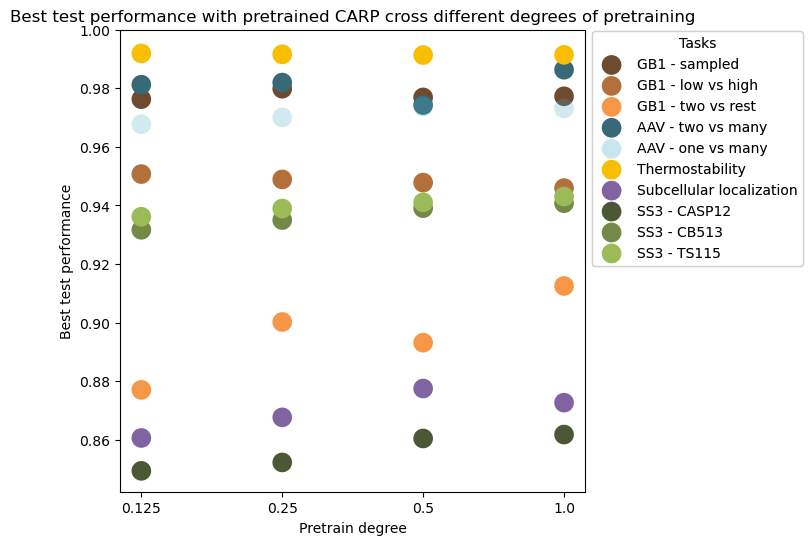

In [35]:
# Plot dots with colors corresponding to the category
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

for category, group in emb_df_melt.groupby(["task"]):
    for subc, subg in group.groupby(["model"]):
        ax.scatter(
            subg["Pretrain degree"],
            subg["Best test performance"],
            s=200, alpha=CARP_ALPHA[subc], 
            label=category,
            color=TASK_SIMPLE_COLOR_MAP.get(category, "gray"),
            edgecolors="none"
        )


# Set y-axis limits
ax.set_ylim(bottom=None, top=1)

# Set labels and title
ax.set_xlabel("Pretrain degree")
ax.set_ylabel("Best test performance")
ax.set_title("Best test performance with pretrained CARP cross different degrees of pretraining")

ax.add_artist(ax.legend(title="Tasks", bbox_to_anchor=(1, 1.012), loc="upper left"))

# Show the plot
plt.show()

In [18]:
ptp_melt_vs_onehot_col = [ptp_melt_col[0]] + [p + " - onehot" for p in ptp_melt_col[1:]]
ptp_melt_vs_onehot_col

['task', '0.125 - onehot', '0.25 - onehot', '0.5 - onehot', '1.0 - onehot']

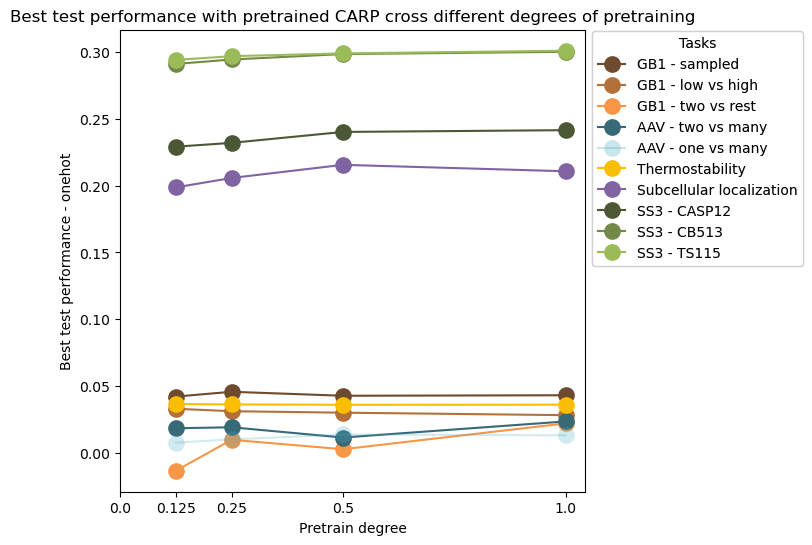

In [38]:
emb_df_melt = pd.melt(
    emb_df[ptp_melt_vs_onehot_col + ["model"]],
    id_vars=["task", "model"],
    var_name="Pretrain degree",
    value_name="Best test performance - onehot",
)

# Plot dots with colors corresponding to the category
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

for category, group in emb_df_melt.groupby("task"):
    for subc, subg in group.groupby("model"):
        ax.plot(
            [float(x.replace(" - onehot", "")) for x in subg["Pretrain degree"]],
            subg["Best test performance - onehot"],
            marker="o",
            markersize=12,
            alpha=CARP_ALPHA[subc],
            label=category,
            color=TASK_SIMPLE_COLOR_MAP.get(category, "gray"),
            mec="none"
        )

ax.set_xticks(all_ptp)
ax.set_xticklabels([str(tick) for tick in all_ptp])

# Set y-axis limits
# ax.set_ylim(bottom=None, top=1)

# Set labels and title
ax.set_xlabel("Pretrain degree")
ax.set_ylabel("Best test performance - onehot")
ax.set_title(
    "Best test performance with pretrained CARP cross different degrees of pretraining"
)

ax.add_artist(ax.legend(title="Tasks", bbox_to_anchor=(1, 1.012), loc="upper left"))

# Show the plot
plt.show()